## Czesc 1.

In [467]:
from sklearn.datasets import make_regression
from scipy.optimize import minimize
import numpy as np
import matplotlib.pyplot as plt
from time import time_ns
from sklearn.model_selection import train_test_split

In [2]:
random_state = 244827
n_samples = 2427

In [3]:
x, true_y = make_regression(n_features=1, random_state=random_state, n_samples=n_samples, noise=16)

Wygenerowane dane prezentują się w następujący sposób

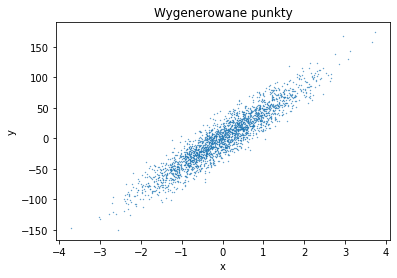

In [4]:
plt.scatter(x, true_y, s=0.1)
plt.xlabel('x')
plt.ylabel('y')
plt.title("Wygenerowane punkty")

plt.show()

In [5]:
def f(w):
    return w[0] + x * w[1]

Obliczenie wspolczynników dla funkcji

In [456]:
ana_start = time_ns()
for i in range(100):
    a = np.concatenate((np.ones((n_samples, 1)), x), 1)
    at = np.transpose(a)
    w = np.matmul(np.matmul(np.linalg.inv(np.matmul(at, a)), at), true_y)
ana_stop = time_ns()

In [7]:
predicted_y_analytical = f(w)

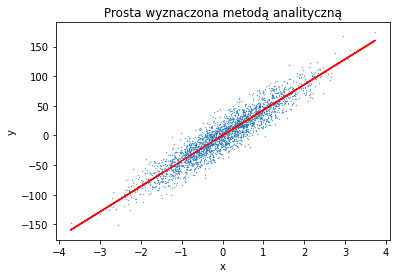

In [8]:
plt.scatter(x, true_y, s=0.1)
plt.plot(x, predicted_y_analytical, c='r')
plt.xlabel('x')
plt.ylabel('y')
plt.title("Prosta wyznaczona metodą analityczną")
plt.show()

Funkcja strat dla metody numerycznej

In [9]:
def numerical_loss(w):
    ret = true_y - np.matmul(a, w)
    ret = np.matmul(ret.transpose(), ret)
    return 1/n_samples * ret

Poczatkowe wspolczynniki

In [450]:
start = np.ones((2,1))

In [458]:
print(a.shape)

(2427, 2)


In [ ]:
minimized = minimize(numerical_loss, start, method='Powell')
predicted_y_numerical = f(minimized.x)

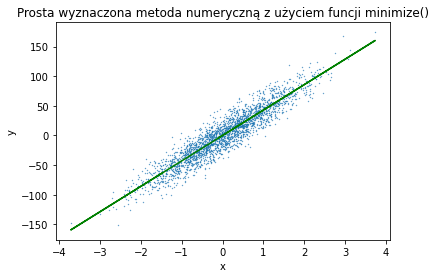

In [11]:
plt.scatter(x, true_y, s=0.1)
plt.plot(x, predicted_y_numerical, c='g')
plt.xlabel('x')
plt.ylabel('y')
plt.title("Prosta wyznaczona metoda numeryczną z użyciem funcji minimize()")
plt.show()

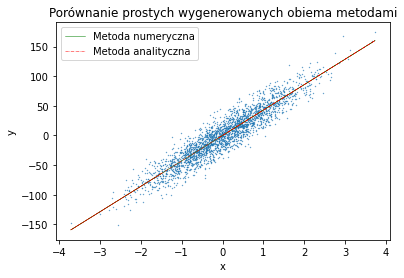

In [12]:
plt.scatter(x, true_y, s=0.1)
plt.plot(x, predicted_y_numerical, c='g', label='Metoda numeryczna', lw=0.5, ls='-')
plt.plot(x, predicted_y_analytical, c='r', label='Metoda analityczna', lw=0.5, ls='-.')
plt.xlabel('x')
plt.ylabel('y')
plt.title("Porównanie prostych wygenerowanych obiema metodami")
plt.legend()
plt.rcParams['figure.figsize'] = [20, 10]
plt.show()


In [13]:
avg_sqr_err_num = np.mean((predicted_y_numerical - true_y) ** 2)
avg_sqr_err_an = np.mean((predicted_y_analytical - true_y) ** 2)

In [449]:
print(f'Metoda numeryczna osiągneła MSE większy o {avg_sqr_err_num - avg_sqr_err_an} od metody analitycznej')

Metoda numeryczna osiągneła MSE większy o 8.711276677786373e-08 od metody analitycznej


## Część 2.


In [522]:
from numpy import genfromtxt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from time import time_ns
from sklearn.metrics import r2_score, mean_squared_error

In [227]:
def f_wielomian(w, x):
    return np.sum(np.matmul(x, w), axis=1)

In [241]:
def make_X(X, n, x):
    for i in range(1, n+1):
        X = np.concatenate((X, np.power(x, i)), axis=1)
    return X

In [242]:
def weights_analytical(X, y):
    XT = np.transpose(X)
    XTX = np.matmul(XT, X)
    XTXI = np.linalg.inv(XTX)
    XY = np.matmul(XT, y)
    W = np.matmul(XTXI, XY)
    return W

In [523]:
def flap_py_comparision(x, y):

    poly21 = PolynomialFeatures(21)
    x_sk_21 = poly21.fit_transform(x)

    poly9 = PolynomialFeatures(9)
    x_sk_9 = poly9.fit_transform(x)

    start_9_an = time_ns()
    for i in range(100):
        w = weights_analytical(x_sk_9, y)
    stop_9_an = time_ns()
    predicted_y_analytical9 = f_wielomian(w, x_sk_9)

    start_21_an = time_ns()
    for i in range(100):
        w = weights_analytical(x_sk_21, y)
    stop_21_an = time_ns()
    predicted_y_analytical21 = f_wielomian(w, x_sk_21)

    start_21_sk = time_ns()
    for i in range(100):
        reg = LinearRegression().fit(x_sk_21, y)
    stop_21_sk = time_ns()
    y_sk_21 = reg.predict(x_sk_21)

    start_9_sk = time_ns()
    for i in range(100):
        reg = LinearRegression().fit(x_sk_9, y)
    stop_9_sk = time_ns()
    y_sk_9 = reg.predict(x_sk_9)

    plt.scatter(x, y, label='Punkty ze zbioru')
    plt.plot(x, predicted_y_analytical9, c='r', label='Metoda analityczna 9. stopnia')
    # plt.plot(x, y_sk_9, c='b', label='sklearn LinearRegression 9. stopnia')
    # plt.plot(x, predicted_y_analytical21, c='m', label='Metoda analityczna 21. stopnia')
    plt.plot(x, y_sk_21, c='g', label='sklearn LinearRegression 21. stopnia')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title("Krzywe wyznaczone różnymi metodami")
    plt.legend()
    plt.show()

    print(f'Metoda analityczna uzyskała błąd średniokwadratowy: {mean_squared_error(y, predicted_y_analytical9)}, blad r2: {r2_score(y, predicted_y_analytical9)}, dla wielomianu 9. stopnia i działał średnio {(stop_9_an - start_9_an) / 100} nanosekund')
    print(f'Model LinearRegression uzyskał błąd średniokwadratowy: {mean_squared_error(y, y_sk_9)}, blad r2: {r2_score(y, y_sk_9)} dla wielomianu 9. stopnia i działał średnio {(stop_9_sk - start_9_sk) / 100} nanosekund')

    print(f'Metoda analityczna uzyskała błąd średniokwadratowy: {mean_squared_error(y, predicted_y_analytical21)}, blad r2: {r2_score(y, predicted_y_analytical21)} dla wielomianu 21. stopnia i działał średnio {(stop_21_an - start_21_an) / 100} nanosekund')
    print(f'Model LinearRegression uzyskał błąd średniokwadratowy: {mean_squared_error(y, y_sk_21)}, blad r2: {r2_score(y, y_sk_21)} dla wielomianu 21. stopnia i działał średnio {(stop_21_sk - start_21_sk) / 100} nanosekund')

In [447]:
def norm(x):
    return (x - np.min(x)) / (np.max(x) - np.min(x))

In [504]:
zbior1 = genfromtxt('zbior1.csv', delimiter=',', dtype=np.float64)
x1, y1 = zbior1[:, 0], zbior1[:, 1]
x1 = x1.reshape((len(x1), 1))
y1 = y1.reshape((len(y1), 1))
x1 = norm(x1)

In [505]:
zbior2 = genfromtxt('zbior2.csv', delimiter=',', dtype=np.float64)
x2, y2 = zbior2[:, 0], zbior2[:, 1]
x2 = x2.reshape((len(x2), 1))
y2 = y2.reshape((len(y2), 1))
x2 = norm(x2)

In [506]:
zbior3 = genfromtxt('zbior3.csv', delimiter=',', dtype=np.float64)
x3, y3 = zbior3[:, 0], zbior3[:, 1]
x3 = x3.reshape((len(x3), 1))
y3 = y3.reshape((len(y3), 1))
x3 = norm(x3)

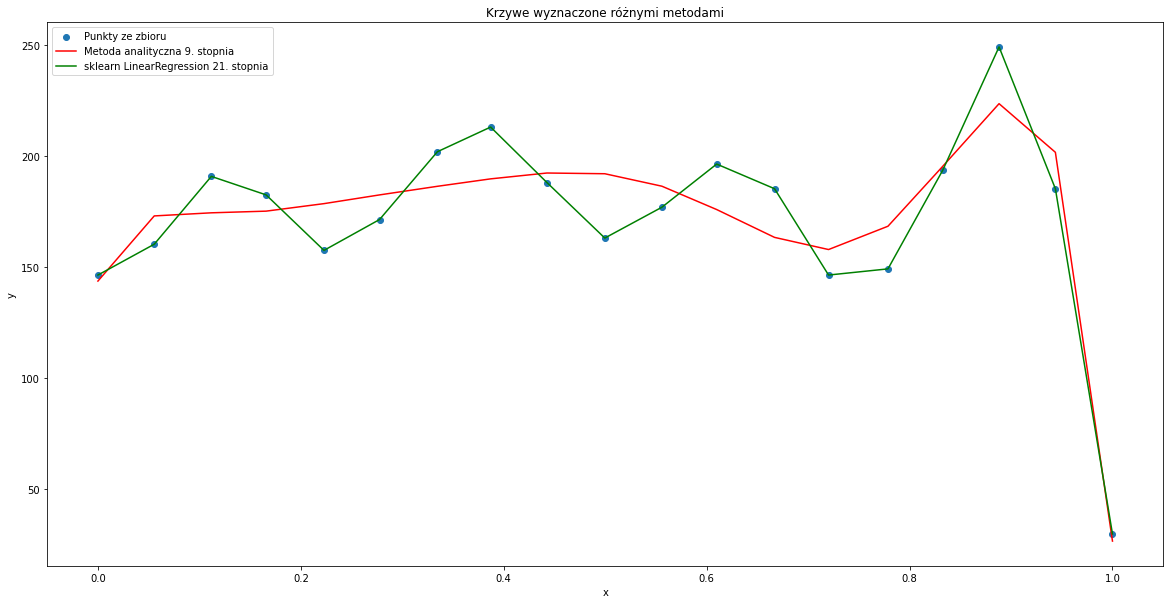

Metoda analityczna uzyskała błąd średniokwadratowy: 270.1327319684444, blad r2: 0.8453308945469105, dla wielomianu 9. stopnia i działał średnio 49594.0 nanosekund
Model LinearRegression uzyskał błąd średniokwadratowy: 270.13272863663, blad r2: 0.8453308964545977 dla wielomianu 9. stopnia i działał średnio 203360.0 nanosekund
Metoda analityczna uzyskała błąd średniokwadratowy: 286240.03467815707, blad r2: -162.8916164876442 dla wielomianu 21. stopnia i działał średnio 124000.0 nanosekund
Model LinearRegression uzyskał błąd średniokwadratowy: 8.710571343599383e-09, blad r2: 0.9999999999950127 dla wielomianu 21. stopnia i działał średnio 238072.0 nanosekund


In [524]:
flap_py_comparision(x1, y1)

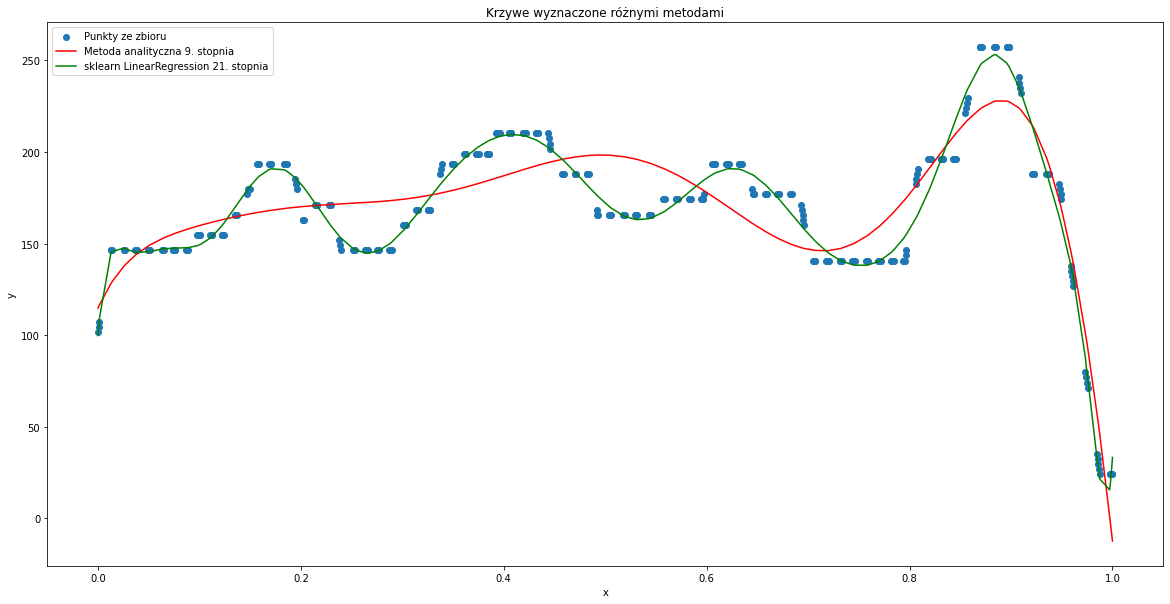

Metoda analityczna uzyskała błąd średniokwadratowy: 352.6709112396239, blad r2: 0.7732419483361863, dla wielomianu 9. stopnia i działał średnio 54559.0 nanosekund
Model LinearRegression uzyskał błąd średniokwadratowy: 352.67090455066653, blad r2: 0.7732419526370087 dla wielomianu 9. stopnia i działał średnio 248006.0 nanosekund
Metoda analityczna uzyskała błąd średniokwadratowy: 79131.00969619144, blad r2: -49.87914260302251 dla wielomianu 21. stopnia i działał średnio 138881.0 nanosekund
Model LinearRegression uzyskał błąd średniokwadratowy: 51.935407482433114, blad r2: 0.9666069090538602 dla wielomianu 21. stopnia i działał średnio 391834.0 nanosekund


In [525]:
flap_py_comparision(x2, y2)

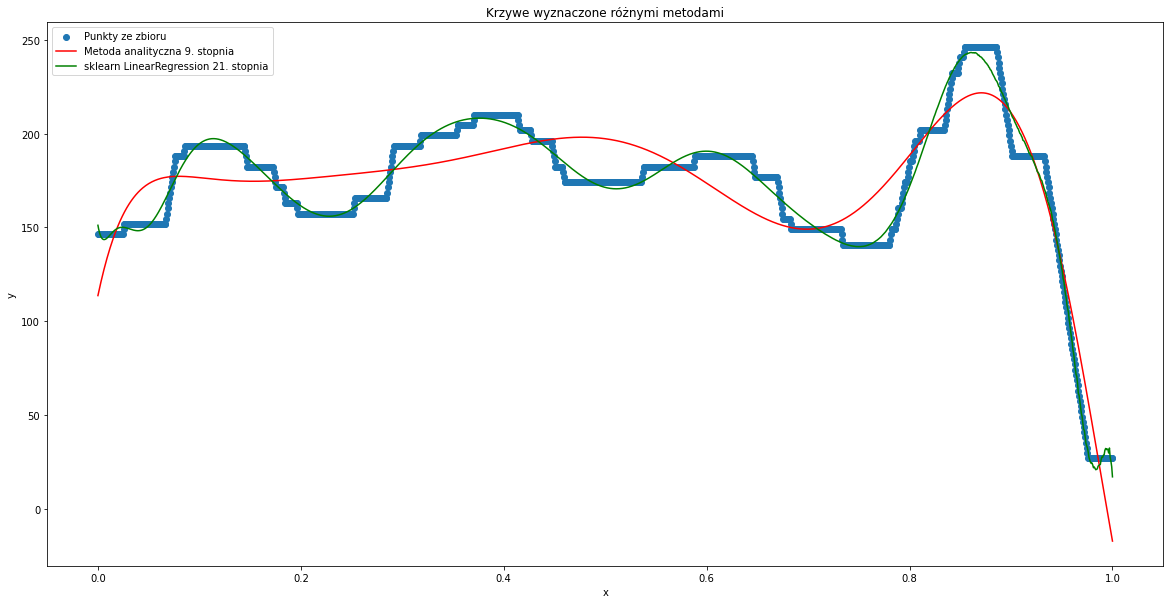

Metoda analityczna uzyskała błąd średniokwadratowy: 287.02787825723385, blad r2: 0.7983709767377358, dla wielomianu 9. stopnia i działał średnio 119034.0 nanosekund
Model LinearRegression uzyskał błąd średniokwadratowy: 287.02787542234137, blad r2: 0.7983709787291682 dla wielomianu 9. stopnia i działał średnio 413535.0 nanosekund
Metoda analityczna uzyskała błąd średniokwadratowy: 49961.68133978605, blad r2: -34.09667796120312 dla wielomianu 21. stopnia i działał średnio 238080.0 nanosekund
Model LinearRegression uzyskał błąd średniokwadratowy: 31.02359773603665, blad r2: 0.9782067938920117 dla wielomianu 21. stopnia i działał średnio 913591.0 nanosekund


In [526]:
flap_py_comparision(x3, y3)

In [490]:
x_test = np.arange(0, 100, 0.1)
x_test = x_test.reshape((len(x_test), 1))
y_test = np.sin(x_test)
y_test = y_test.reshape((len(y_test), 1))
x_test = norm(x_test) + 1

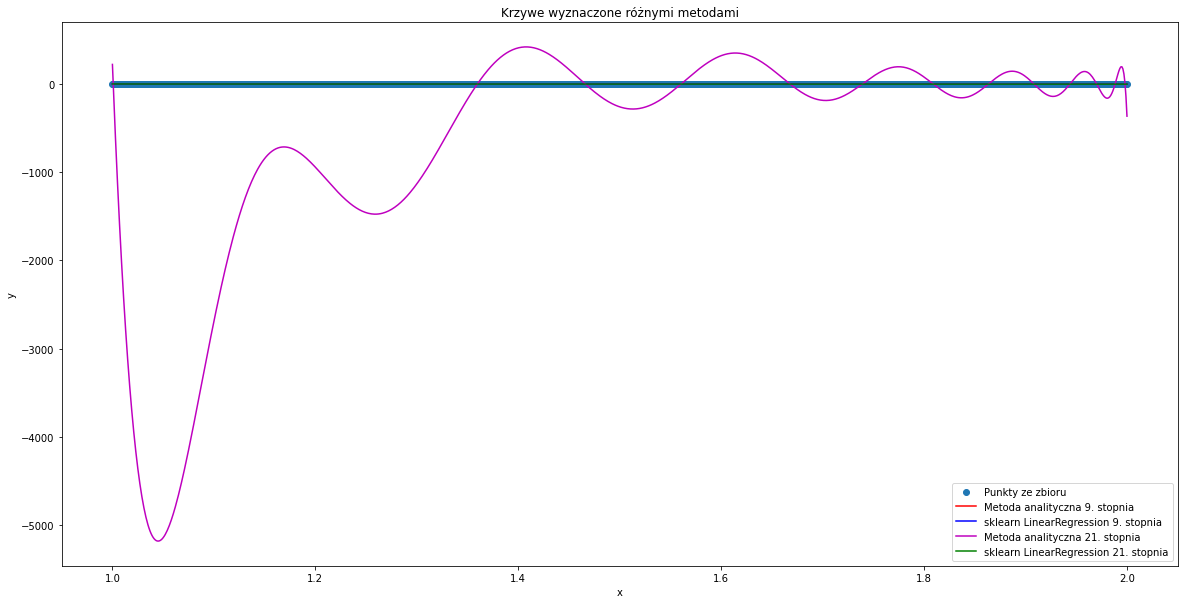

Metoda analityczna uzyskała błąd średniokwadratowy: 0.5151912290339955, blad r2: 0.025269868809638996, dla wielomianu 9. stopnia i działał średnio 515839.0 nanosekund
Model LinearRegression uzyskał błąd średniokwadratowy: 0.484835173328777, blad r2: 0.03427965176328307 dla wielomianu 9. stopnia i działał średnio 539891.0 nanosekund
Metoda analityczna uzyskała błąd średniokwadratowy: 2070161.0555868433, blad r2: -4123466.4403381525 dla wielomianu 21. stopnia i działał średnio 16561773.0 nanosekund
Model LinearRegression uzyskał błąd średniokwadratowy: 0.481226854143277, blad r2: 0.04146689281356741 dla wielomianu 21. stopnia i działał średnio 1011848.0 nanosekund


In [491]:
flap_py_comparision(x_test, y_test)


## Część 3.

In [367]:
from sklearn.linear_model import Ridge

In [473]:
def ridge_comparision(x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=random_state, shuffle=False)
    x_train = norm(x_train)
    x_test = norm(x_test)

    poly16 = PolynomialFeatures(15)

    X_ridge = poly16.fit_transform(x_train)
    X_test = poly16.fit_transform(x_test)

    self_start = time_ns()
    for i in range(100):
        XT_ridge = np.transpose(X_ridge)
        I = np.identity(16)
        a = 1e-50
        XTX = np.matmul(XT_ridge, X_ridge)
        aI = np.multiply(a, I)
        XI = XTX + aI
        XIIn = np.linalg.inv(XI)
        Xy = np.matmul(XT_ridge, y_train)
        w = np.matmul(XIIn, Xy)
    self_stop = time_ns()
    y_self_ridge_test = f_wielomian(w, X_test)

    sk_start = time_ns()
    for i in range(100):
        ridge = Ridge(alpha=1e-50)
        est = ridge.fit(X_ridge, y_train)
    sk_stop = time_ns()
    y_sk_test = est.predict(X_test)
    x = np.arange(0, 1, 0.1)
    X_full = poly16.fit_transform(x)

    y_self_predicted = f_wielomian(w, X_full)
    y_sk_pred = est.predict(X_full)

    plt.scatter(x_train, y_train, c='b', label='Dane treningowe')
    plt.plot(x, y_self_predicted, c='r', label='Krzywa wyznaczona własną implementacją ridge regression')
    plt.plot(x, y_sk_pred, c='g', label='Krzywa wyznaczona przez model Ridge z sklearn')
    plt.legend()
    plt.show()

    print(f'Własna implementacja osiągnęła MSE: {MSE(y_self_ridge_test, y_test)}, blad r2: {r2_score(y_test, y_self_ridge_test)}, sredni czas trwania to {(self_stop - self_start) / 100} nanosekund')
    print(f'Implementacja sklearn osiągnęła MSE: {MSE(y_sk_test, y_test)}, blad r2: {r2_score(y_test, y_sk_test)}, sredni czas trwania to {(sk_stop - sk_start) / 100} nanosekund')

In [424]:
# poly16 = PolynomialFeatures(15)
# X_ridge = poly16.fit_transform(x3)
#
# XT_ridge = np.transpose(X_ridge)
# I = np.identity(16)
# a = 1e-50
#
# XTX = np.matmul(XT_ridge, X_ridge)
# aI = np.multiply(a, I)
# XI = XTX + aI
# XIIn = np.linalg.inv(XI)
# Xy = np.matmul(XT_ridge, y3)
# w = np.matmul(XIIn, Xy)
#
# y_ridge_predicted = f_wielomian(w, X_ridge)
#
# plt.scatter(x3, y3)
# plt.plot(x3, y_ridge_predicted)
# plt.show()
#
# poly16 = PolynomialFeatures(15)
# x_poly_16 = poly16.fit_transform(x1)
# ridge = Ridge(alpha=1e-50)
# est = ridge.fit(x_poly_16, y1)
# print(x_poly_16.shape)
#
# y_pred = est.predict(x_poly_16)
#
# plt.scatter(x1, y1)
# plt.plot(x1, y_pred)
# plt.show()
#
# est.score(x_poly_16, y1)

In [475]:
zbior1 = genfromtxt('zbior1.csv', delimiter=',', dtype=np.float64)
x1, y1 = zbior1[:, 0], zbior1[:, 1]
x1 = x1.reshape((len(x1), 1))
y1 = y1.reshape((len(y1), 1))


In [476]:
zbior2 = genfromtxt('zbior2.csv', delimiter=',', dtype=np.float64)
x2, y2 = zbior2[:, 0], zbior2[:, 1]
x2 = x2.reshape((len(x2), 1))
y2 = y2.reshape((len(y2), 1))

In [477]:
zbior3 = genfromtxt('zbior3.csv', delimiter=',', dtype=np.float64)
x3, y3 = zbior3[:, 0], zbior3[:, 1]
x3 = x3.reshape((len(x3), 1))
y3 = y3.reshape((len(y3), 1))

In [479]:
ridge_comparision(x1, y1)
ridge_comparision(x2, y2)
ridge_comparision(x3, y3)

D:\Python\Skrypty\venv\lib\site-packages\sklearn\linear_model\_ridge.py:196: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
D:\Python\Skrypty\venv\lib\site-packages\sklearn\linear_model\_ridge.py:196: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
D:\Python\Skrypty\venv\lib\site-packages\sklearn\linear_model\_ridge.py:196: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
D:\Python\Skrypty\venv\lib\site-packages\sklearn\linear_model\_ridge.py:196: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
D:\Python\Skrypty\venv\lib\site-packages\sklearn\linear_model\_ridge.py:196: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
D:\Python\Skrypty\venv\lib\site-packages\sklearn\linear_model\_ridge.p

ValueError: X has 1 features, but Ridge is expecting 16 features as input.